<div style="border: ridge black 2px; padding: 15px">
    
Материалы: 
- [Ссылка на презентацию](https://drive.google.com/file/d/1OPCO5T5maZbKPfuq7yWo43tvA4b2k5wu/view?usp=sharing)
    
</div>

# "Сегментация покупателей по профилю потребления"<a class="tocSkip">

## Цель исследования

<div style="border: ridge black 3px; padding: 25px">

<b>Целью данного исследования является сегментирование покупателей интернет-магазина товаров для дома "Пока все ещё тут" на основе профилей их потребления.</b><br><br>
    
Итоговая сегментация призвана помочь продакт-менеджеру (как заказчику данного исследования) сформулировать персонализированные предложения для покупателей интернет-магазина.<br><br>
    
В конце исследования мы сформулируем общий вывод и дадим рекомендации.<br><br>
    
Результат исследования будет предоставлен продакт-менеджеру в форме презентации в формате `.pdf`.
    
</div>

## Описание исходных данных

Для анализа в нашем распоряжении датасет с данными транзакций интернет-магазина.

Ниже представлено описание информации по датасету.

Датасет имеет 6 столбцов:


- `date` - дата заказа

- `customer_id` - идентификатор покупателя

- `order_id` - идентификатор заказа

- `product` - наименование товара

- `quantity` - количество товара в заказе

- `price` - цена товара


## Загрузка и открытие данных

In [1]:
# импортируем основные нужные библиотеки 

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from pymystem3 import Mystem
from collections import Counter

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
# предоставленный датасет мы загрузили на `drive.google.com` для удобства 

url = 'https://drive.google.com/file/d/1wLHj4EzwrSOslPSuuXsV6g1R5O74ukb9/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# читаем файл по указанной ссылке

data = pd.read_csv(path)

In [3]:
# посмотрим на общую информацию по каждой таблице и выведем на экран содержимое первых 10 строк

print(data.info())
print('----------------------------------------------------------------------------------------------------------------------')
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB
None
----------------------------------------------------------------------------------------------------------------------


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


При открытии данных мы видим, что:

- 6737 наблюдений в датасете
- пропусков в данных нет
- названия столбцов имеют понятный вид, коррекции не требуют
- столбец `date` необходимо перевести из типа данных *'int64'* в тип *'datetime'*
- содержимое столбца 'product' приведем к нижнему регистру
- столбец `price` переведем в целочисленный тип *'int6'*

In [4]:
# для последующего отображения всего содержимого строк, в частности столбца `product` применим этот метод:

pd.options.display.max_colwidth = 200

## Предобработка данных

### Изменение типов данных

Приводим столбцы `date` (создадим новый столбец `date_time`) и `price` к нужному типу данных . 

Содержимое столбца `product` приведем к нижнему регистру.

In [5]:
data['date_time'] = pd.to_datetime(data['date'], format='%Y%m%d%H') 
data['price'] = data['price'].astype('int')
data['product'] = data['product'].str.lower()

# сразу оценим за какой период мы имеем данные

display(data['date_time'].describe())
data.head(5)

count                    6737
unique                   2606
top       2019-04-27 16:00:00
freq                       51
first     2018-10-01 00:00:00
last      2019-10-31 16:00:00
Name: date_time, dtype: object

,date,customer_id,order_id,product,quantity,price,date_time
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194,2018-10-01
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01


Имеем данные за период с 1 Октября 2018 по 31 Октября 2019 (13 месяцев).

### Поиск и обработка дубликатов

Проверим наличие грубых дубликатов в датасете.

In [6]:
duplicates = data.duplicated().sum()

if duplicates > 0:
    print('Количество дубликатов =', duplicates)
else:
    print('Дубликатов не найдено')

Дубликатов не найдено


Дополнительно проверим есть ли скрытые дубликаты.

In [7]:
# отсортируем по order_id и оценим визуально содержимое

data.sort_values(by='order_id').head(15)

,date,customer_id,order_id,product,quantity,price,date_time
4341,2019060220,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 50-100 см",1,225,2019-06-02 20:00:00
4340,2019060220,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 25-50 см",1,150,2019-06-02 20:00:00
758,2018111017,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,2018-11-10 17:00:00
588,2018110214,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,2018-11-02 14:00:00
511,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,2018-10-28 19:00:00
510,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,2018-10-28 19:00:00
509,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315,2018-10-28 19:00:00
590,2018110214,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,2018-11-02 14:00:00
759,2018111017,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207,2018-11-10 17:00:00
760,2018111017,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162,2018-11-10 17:00:00


На примере заказа 13547 мы видим странную ситуацию с датами и повторяющимися позициями.

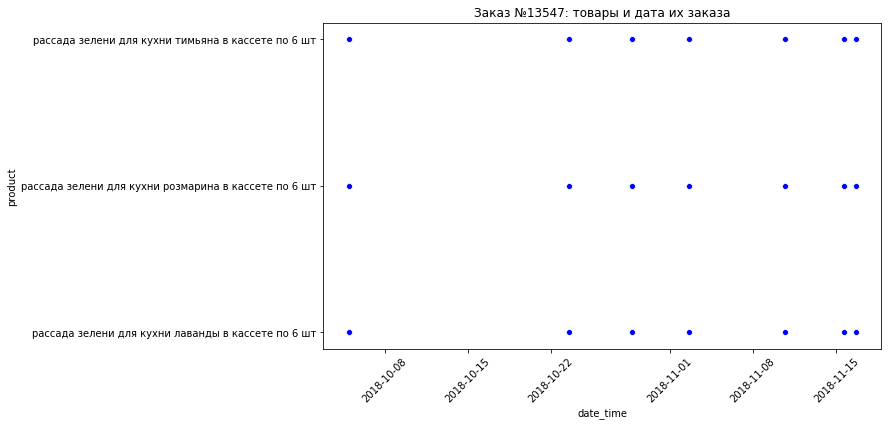

In [8]:
# визуально оценим картину

plt.figure(figsize=(10,6))
plt.title('Заказ №13547: товары и дата их заказа')
sns.scatterplot(data=data.loc[data['order_id']==13547], y='product', x='date_time', color='blue')
plt.tick_params(axis='x', labelrotation=45)
plt.show()

Разные товары заказаны поштучно в разные дни (допустим, что столбец `quantity` не просто так в наших данных и мы можем на него ориентироваться как на маркер, считающий одинаковое кол-во товаров в заказе), при этом номер заказа остается одним и тем же. При доставке товаров в разные дни логично, чтобы номер заказа был разным. 

Возможно были технические неполадки и записывалось событие "положил в корзину, но еще не оплатил" как новая позиция в заказе вместе с указанием даты, но по факту состав заказа был без дубляжей с фактической датой заказа в последний день наблюдений (здесь это 15 Ноября 2018).

Поэтому проверим сколько таких дубликатов, если не учитывать дату, и удалим их.

In [9]:
duplicates_upd = data[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated().sum()

print("При исключении даты найдено дубликатов:", duplicates_upd)
print('% дубликатов от общего кол-ва наблюдений:', (duplicates_upd / len(data))*100)

При исключении даты найдено дубликатов: 1864
% дубликатов от общего кол-ва наблюдений: 27.668101528870416


27% могут исказить конечный результат, поэтому удаляем их.

In [10]:
data = data.drop(data[data[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated()==True].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 6735
Data columns (total 7 columns):
date           4873 non-null int64
customer_id    4873 non-null object
order_id       4873 non-null int64
product        4873 non-null object
quantity       4873 non-null int64
price          4873 non-null int64
date_time      4873 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 304.6+ KB


### Поиск и обработка аномалий

In [11]:
# вызовем метод describe() 

data.describe()

,date,order_id,quantity,price
count,4.873000e+03,4873.000000,4873.000000,4873.000000
mean,2.018814e+09,48231.287503,2.837472,514.749846
std,4.097364e+05,27341.349829,17.606813,944.455480
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.018123e+09,14776.000000,1.000000,90.000000
50%,2.019041e+09,68860.000000,1.000000,150.000000
75%,2.019060e+09,70833.000000,1.000000,488.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


Видим явный выброс в столбце `quantity` (max = 1000). И максимальная цена товара составляет 14917 руб. (вполне реальная цифра).

Для нахождения аномальных оптовых клиентов и их исключения из данных посмотрим на крайние 5 перцентилей `quantity`.

In [12]:
np.percentile(data['quantity'], [95, 96, 97, 98, 99])

array([ 8., 10., 12., 20., 30.])

Не более, чем у 5% заказов встречается более 8 позиций одного и того же товара.

Не более, чем у 4% заказов встречается более 10 позиций одного и того же товара.

Не более, чем у 3% заказов встречается более 12 позиций одного и того же товара.

Не более, чем у 2% заказов встречается более 20 позиций одного и того же товара.

Не более, чем у 1% заказов встречается более 30 позиций одного и того же товара.
___

8, 10, 12 позиций товаров вполне вероятно мог купить и обычный розничный покупатель (рассада, семена, тарелки, вилки, ножи, губки и пр.). 20 экземпляров уже представляется редким явлением для розничного покупателя, но будем считать границу 98 перцентиля границей отсечения аномальных заказов, где `quantity` >= 30. 

In [13]:
# обновим датасет, исключив все аномальные заказы

data_upd = data.loc[data['quantity']<30]

### Добавление новых данных в датасет

Добавим столбец с итоговой суммой покупки:

In [14]:
data_upd['final_price'] = data_upd['price'] * data_upd['quantity']

Добавим столбцы с вариациями временного формата, такими как: 'дата', 'месяц-год', 'месяц', 'день недели' и 'час'.

In [15]:
data_upd['date'] = data_upd['date_time'].dt.date
data_upd['month_year'] = data_upd['date_time'].dt.to_period('M')
data_upd['month'] = data_upd['date_time'].dt.month_name()
data_upd['weekday'] = data_upd['date_time'].dt.weekday_name
data_upd['hour'] = data_upd['date_time'].dt.hour

data_upd.head(2)

,date,customer_id,order_id,product,quantity,price,date_time,final_price,month_year,month,weekday,hour
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,142,2018-10,October,Monday,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194,2018-10-01,194,2018-10,October,Monday,0


## Исследовательский анализ

### Изучение распределения количества заказов во времени

Создадим цикл для отрисовки графиков распределения заказов по месяцу-году, отдельно месяцу, дню недели и часу:

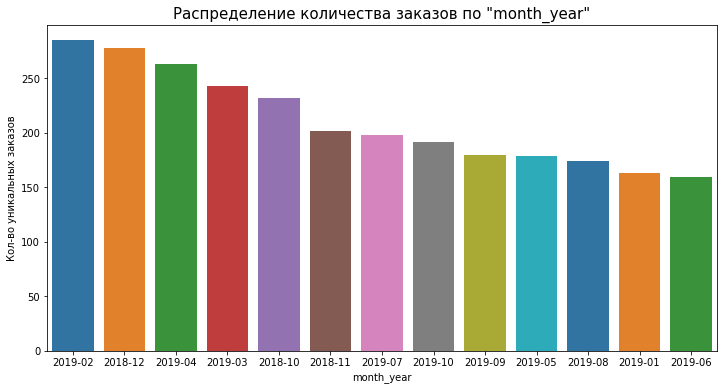

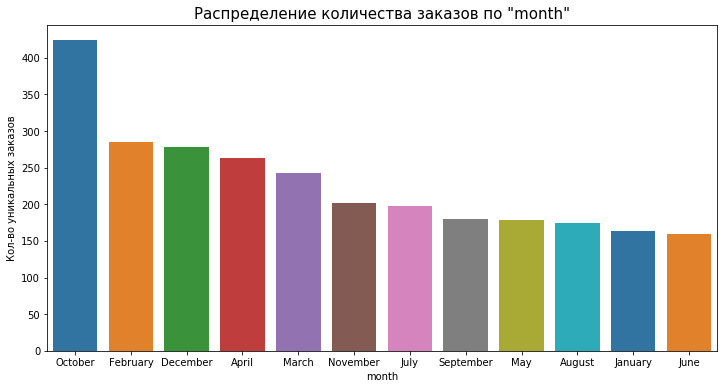

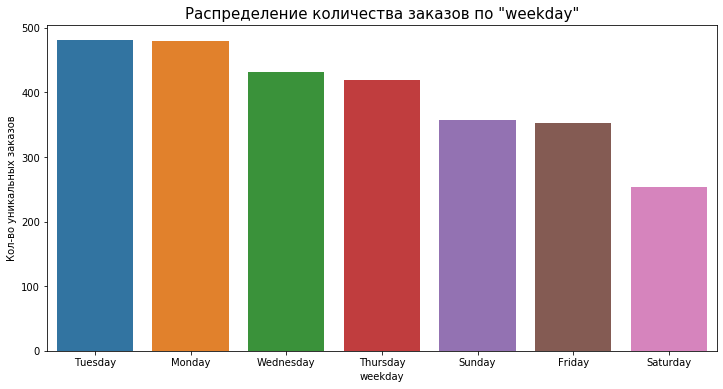

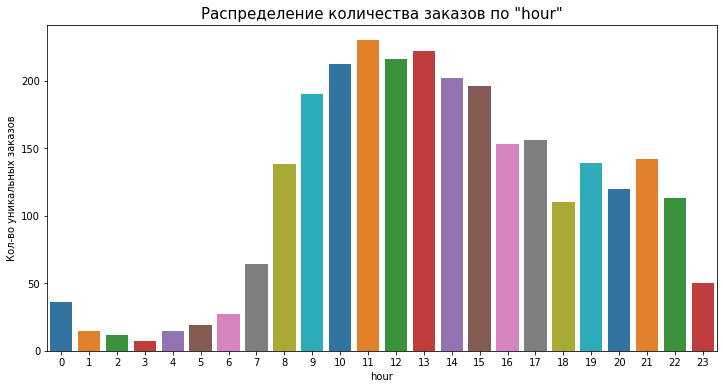

In [16]:
for column in ['month_year', 'month', 'weekday', 'hour']:
    timeformat_orders = data_upd.groupby(column).agg({'order_id': 'nunique'}).reset_index() \
    .sort_values(by='order_id', ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(data=timeformat_orders, x=column, y='order_id', palette="tab10")
    plt.title('Распределение количества заказов по "{}"'.format(data_upd[column].name), fontsize=15)  
    plt.ylabel('Кол-во уникальных заказов')
    plt.show()

<div style="border:solid black 2px; padding: 20px">
    
Видим, что:<br><br>
    
1. В Феврале 2019 г. было больше всего заказов. Декабрь 2018 и Апрель 2019 на 2 и 3 месте, соответственно.<br>
2. Из месяцев Октябрь вышел на 1-ое месте по кол-ву заказ по иной причине: он представлен и в 2018 г., и в 2019 г.<br>
3. Среди дней недели "Вторник" и "Понедельник" - лидеры по кол-ву оформленных заказов. По направлению к выходным падает и кол-во заказов. В Субботу частота оформления заказов ниже всего (вероятно, клиенты предпочитают отдыхать после трудовой недели).<br> 
4. В период времени с 9:00 до 15:00 наблюдаются пиковые показатели кол-ва сделанных заказов. Чуть меньше заказов с 16:00 до 22:00.<br>
5. И меньше всего заказов оформляется в ночное время с 23:00 до 07:00 утра.<br>
    
</div>

### Изучение распределения количества купленных товаров

,quantity,order_id,ratio
0,1,3812,79.2
1,2,443,9.2
2,3,140,2.9
3,4,101,2.1
9,10,72,1.5
4,5,67,1.4
5,6,42,0.9
14,15,23,0.5
6,7,22,0.5
22,25,16,0.3


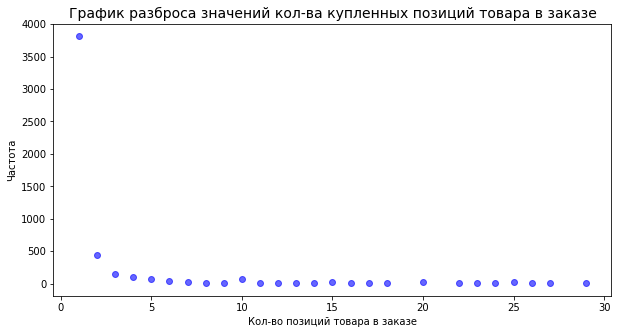

In [17]:
# сгруппируем по кол-ву позиций товаров и определим частоту разброса

quantity_data = data_upd.groupby('quantity').agg({'order_id': 'count'}).reset_index()
quantity_data['ratio'] = ((quantity_data['order_id'] / quantity_data['order_id'].sum())*100).round(1)

display(quantity_data.sort_values(by='order_id', ascending=False).head(10))

plt.figure(figsize=(10,5))
plt.scatter(x=quantity_data['quantity'], y=quantity_data['order_id'], alpha=0.6, color='blue') 
plt.xlabel('Кол-во позиций товара в заказе')
plt.ylabel('Частота')
plt.title('График разброса значений кол-ва купленных позиций товара в заказе', fontsize=14)
plt.show()

<div style="border:solid black 2px; padding: 20px">
    
Видим, что:<br><br>
1. Больше всего покупатели заказывают поштучно. Доля штучных добавлений товара в заказ составляет 79% от общего кол-ва всех доступных `quantity` в заказах.<br>
2. 2 позиции товара в заказе на 2-ом месте, но встречаются редко (доля 9.2%).<br>
    
</div>

### Изучение распределения частоты покупок (по каждому покупателю)

,n_orders,n_customers,orders_per_customer
month_year,,,
2018-10,232,177,1.310734
2018-12,278,232,1.198276
2019-02,285,243,1.172840
2019-10,192,164,1.170732
2018-11,202,176,1.147727
2019-04,263,236,1.114407
2019-01,163,148,1.101351
2019-05,179,168,1.065476
2019-07,198,186,1.064516


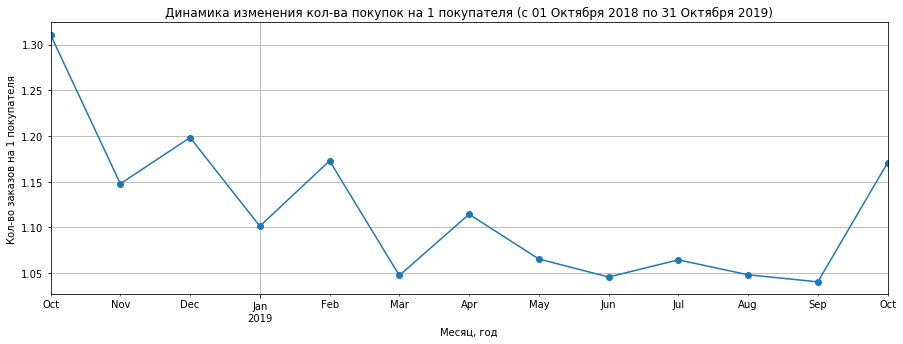

За период с 01 Октября 2018 по 31 Октября 2019 в среднем на 1 покупателя приходится 1.1175292221541677 заказ(а).


In [18]:
# сгруппируем по дате (месяц-год) и определим количество заказов и уникальных покупателей в каждом из месяцев
# и рассчитаем сколько в среднем заказов приходится на 1 покупателя

orders_by_month_year = data_upd.groupby('month_year').agg({'order_id': 'nunique', 'customer_id': 'nunique'})
orders_by_month_year.columns = ['n_orders', 'n_customers']
orders_by_month_year['orders_per_customer'] = orders_by_month_year['n_orders'] \
                                                 /orders_by_month_year['n_customers']
display(orders_by_month_year.sort_values(by='orders_per_customer', ascending=False))

# построим график с динамикой изменения 'orders_per_customer' по месяцам

ax = orders_by_month_year['orders_per_customer'].plot(style='o-', grid=True, figsize=(15, 5))
ax.set_xlabel('Месяц, год')
ax.set_ylabel('Кол-во заказов на 1 покупателя')
ax.set_title('Динамика изменения кол-ва покупок на 1 покупателя (с 01 Октября 2018 по 31 Октября 2019)')
plt.show()

print('За период с 01 Октября 2018 по 31 Октября 2019 в среднем на 1 покупателя приходится {} заказ(а).'. \
      format(orders_by_month_year['orders_per_customer'].mean()))

<div style="border:solid black 2px; padding: 20px">
    
Видим, что:<br><br>

1. Несмотря на небольшие отличия по месяцам 1 среднестатистический покупатель интернет-магазина не делал больше 1 заказа за исследуемый период  с 01 Октября 2018 по 31 Октября 2019.<br>
2. В среднем 2-ой заказ оформляют крайне редко: 11 человек из 100.<br>
    
</div>

### Изучение распределения цен

Посмотрим в каком ценовом диапазоне лежат итоговые цены заказов покупателей и на какую цену чаще всего покупатели совершают заказы.

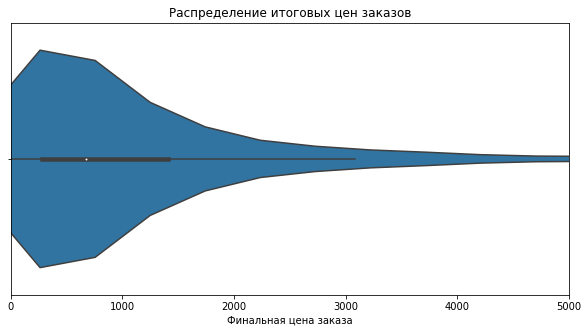

count     2735.000000
mean      1161.837294
std       1795.529690
min         14.000000
25%        284.000000
50%        674.000000
75%       1412.000000
max      47385.000000
Name: final_price, dtype: float64

In [19]:
total_order_price = data_upd.groupby('order_id')['final_price'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.xlim(0, 5000)
sns.violinplot(x=total_order_price['final_price'])
plt.title('Распределение итоговых цен заказов')
plt.xlabel('Финальная цена заказа')
plt.show()
display(total_order_price['final_price'].describe())

Видим, что в данных есть редкие значения, но в среднем (по медиане) цена заказа не превышает 674 руб.

Межквартильный размах находится в диапазоне 284 руб. и 1412 руб.

Посмотрим на покупателя, который совершил заказ на сумму 47385 руб.

In [20]:
finalprice_47385 = data_upd.loc[data_upd['final_price']==47385]
finalprice_47385

,date,customer_id,order_id,product,quantity,price,date_time,final_price,month_year,month,weekday,hour
1518,2019-01-15,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,27,1755,2019-01-15 13:00:00,47385,2019-01,January,Tuesday,13


27 вафельных простыней по цене 1755 руб./шт. вероятно мог купить подрядчик или представитель СПА-салон/мини-отеля. Исключим этого клиента из датасета.

In [21]:
 data_upd = data_upd.loc[data_upd['final_price']!=47385]

### Изучение среднего чека

Рассчитаем средний чек и визуализируем его динамику во времени.

,revenue,n_orders,mean_check
month_year,,,
2018-11,313170,202,1550.3
2018-10,325002,232,1400.9
2019-05,220165,179,1230.0
2019-07,235410,198,1188.9
2019-04,296545,263,1127.5
2019-06,180318,160,1127.0
2018-12,308586,278,1110.0
2019-02,298335,285,1046.8
2019-01,166476,162,1027.6


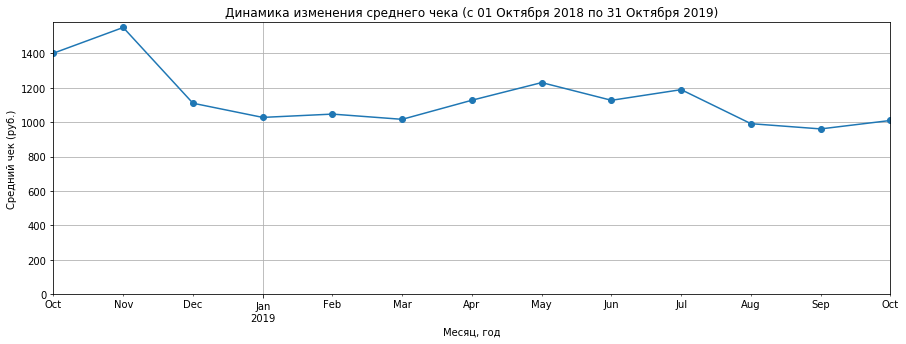

Средний чек (за период с 01 Октября 2018 по 31 Октября 2019) = 1137.0 руб.


In [22]:
# сгруппируем по дате (месяц-год) и определим количество заказов и уникальных покупателей в каждом из месяцев
# и рассчитаем средний чек

meancheck_by_month_year = data_upd.groupby('month_year').agg({'final_price': 'sum', 'order_id': 'nunique'})
meancheck_by_month_year.columns = ['revenue', 'n_orders']
meancheck_by_month_year['mean_check'] = (meancheck_by_month_year['revenue'] / \
                                         meancheck_by_month_year['n_orders']).round(1)
display(meancheck_by_month_year.sort_values(by='mean_check', ascending=False))

# построим график с динамикой изменения 'orders_per_user' по месяцам

ax = meancheck_by_month_year['mean_check'].plot(style='o-', grid=True, figsize=(15, 5))
ax.set_xlabel('Месяц, год')
ax.set_ylabel('Средний чек (руб.)')
ax.set_title('Динамика изменения среднего чека (с 01 Октября 2018 по 31 Октября 2019)')
plt.ylim(0)
plt.show()

print('Средний чек (за период с 01 Октября 2018 по 31 Октября 2019) = {} руб.'. \
      format((meancheck_by_month_year['mean_check'].mean()).round(0)))

<div style="border:solid black 2px; padding: 20px">
    
Видим, что:<br><br>

1. Средний чек = 1137 руб.<br>
2. В целом, за исключением 2 месяцев, где средний чек достигал максимальных показателей - Май 2019 (1230 руб.) и Июль 2019 (1188 руб.) - динамика среднего чека не показывает явных пиковых периодов (за исключением Октября 2018 и Ноября 2018, где средний чек был равен 1400 руб. и 1550 руб., соответственно).<br><br>
    
Повышение среднего чека в Мае связано с наступлением дачного сезона, а в Июле, вероятно, с наступлением отпусков у большинства клиентов.<br>
    
</div>

## Категоризация наименований товаров

Для определения товарных категорий произведём лемматизацию столбца с названием товара `product`.

### Лемматизация

Судя по порядку слов в названии товара мы сможем, ориентируясь на первые 2 слова в названии, упростить процесс лемматизации.

Поэтому, добавим к датасету новый столбец `2words_product` с выделением в него первых 2-х слов из столбца `product`.

In [23]:
data_upd['2words_product'] = data_upd['product'].apply(lambda x: x.split()[:2])
data_upd['2words_product'] = data_upd['2words_product'].apply(lambda x: " ".join(x))

data_upd.head(2)

,date,customer_id,order_id,product,quantity,price,date_time,final_price,month_year,month,weekday,hour,2words_product
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,142,2018-10,October,Monday,0,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194,2018-10-01,194,2018-10,October,Monday,0,комнатное растение


In [24]:
# запустим лемматизацию по столбцу `2words_product` и с помощью Counter выведем на экран все частовстречающиеся леммы

m = Mystem()
lemmas = []
for i in data_upd['2words_product'].unique():
    result = ''.join(m.lemmatize(i)).strip()
    lemmas.append(result)
words = m.lemmatize(' '.join(lemmas))
# Counter(words) закомментирую вывод из-за длины результата

<div style="border:solid black 2px; padding: 20px">

По найденным леммам сформируем <b>9 категорий товаров</b>:<br><br>

- Комнатные растения<br>
- Садовые растения и рассада<br>
- Ванная<br>
- Товары для быта<br>
- Текстиль<br>
- Садовые принадлежности<br>
- Кухня<br>
- Инструменты<br>
- Декор и другие товары<br>

</div>

Создадим для каждой категории (Комнатные и садовые растения объединим временно вместе в 1 список `plants_list`) список с ключевыми леммами:

In [25]:
plants_list = ['радермахер', 'хризолидокарпус', 'лутесценс', 'циперус', 'зумул', 'шеффлер', 'лузеан', 'глоксиния', 'синнингия', 
          'юкка', 'многолетний', 'рассада', 'зелень','пеларгония', 'суккулент', 'эхеверие', 'эвкалипт', 'гунни', 
          'адиантум', 'калатея', 'нолина', 'хлорофитум', 'цикламен', 'азалия', 'гортензия', 'хризантема', 
          'тыква', 'иссоп', 'сантолина', 'аспарагус', 'скуаррос', 'антуриум', 'андрианум', 'фиалка', 'молодило', 'томат',
          'гербера', 'душица', 'мелисса', 'роза', 'бегония', 'розмарин', 'чеснок', 'баклажан', 'ананас', 'манго', 
          'морковь', 'альбук', 'бальзамин', 'крассула', 'артемизия', 'полынь', 'лаванда', 'мята', 'желудь', 'каланхое', 
          'каландив', 'примула', 'акаулис', 'бархатцы', 'настурция', 'огурец', 'петуния', 'алиссум', 'годеция', 'гвоздика',
          'календула', 'капуста', 'кореопсис', 'толла', 'лапчатка', 'флокс', 'друммонд', 'цинерария', 'эшшольция',
          'диффенбахий', 'фаленопсис', 'подсолнечник', 'пуансетия', 'ясколка', 'примус', 'гиностемма', 'ель', 'кипарисовик', 
          'лавсон', 'аптение', 'грандифлора', 'пуансеттия', 'скиммия', 'спренжери', 'фиттоний', 'рассада', 'кустовой', 'тимьян', 
          'алоэ', 'фикус', 'кодонант', 'гимнокалициум', 'крокус', 'спатифиллум', 'гипсофил', 'калибрахоа', 'эпипремнум', 'базилик',
          'аквилегия', 'горох', 'амброзия', 'земляника', 'незабудка', 'седум', 'овощной', 'укроп', 'нефролепис', 'калла', 
          'крупноцветковый', 'декабрист', 'тюльпан', 'гиацинт', 'вербена', 'гибридный', 'ранункулус', 'овсянница', 'георгин',
          'смолевка', 'цинния', 'лавр', 'вербейник', 'травянка', 'виола', 'колокольчик', 'остеоспермум', 'эхинацея', 
          'лилейник', 'папоротник', 'страусник', 'платикодон', 'энотера', 'фуксия', 'цитрофортунелла', 'кумкват', 'гвоздик',
          'пеперомия', 'дыня', 'циния', 'гардения', 'помидор', 'однолетний', 'лобелия', 'сильвердроп', 'мускарь', 'эхинокактус', 
          'пиретрум', 'агератум', 'колеус', 'тагетис', 'цинерания', 'муррайя', 'астра', 'аргирантерум', 'свитуния', 'дендробиум',
          'целозия', 'шуга', 'альба', 'мара', 'хоня', 'патиссон', 'маттиола', 'брокколи', 'кабачок', 'лук', 'драцена',
          'фатсия', 'ромашка', 'рудбекия', 'очиток', 'барвинок', 'элатиор', 'осина', 'сциндапсус', 'трава', 'бузульник', 
          'арендс', 'солидаго', 'физостегия', 'бадан', 'лен', 'нобилис', 'анемон', 'буддлей', 'валериана', 'змееголовник',
          'кольраби', 'петрушка', 'сельдерей', 'шалфей', 'зверобой', 'мединилла', 'клен', 'амариллис', 'салат', 'литопс', 
          'калоцефалус', 'каллун', 'капсикум', 'мимоза', 'соланум', 'львиный зев', 'мирт', 'чабер', 'котовник', 'чабер', 
          'вероника', 'арбуз', 'джункус', 'хоста', 'лантан', 'лаватер', 'любисток', 'монард', 'табак', 'вигна', 
          'хамедорей', 'лантан', 'импатиенс', 'замиокулькас', 'пахира']

bathroom_list = ['сушилка', 'таз', 'ерш', 'дозатор', 'биопорошок', 'мыло', 'зубной', 'швабра', 'ополаскиватель', 'мыльница',
            'вантуз', 'кондиционер', 'соль', 'увлажнять', 'скраб', 'бельевой', 'ванна', 'отбеливатель', 
            'махровый', 'фен', 'дорожный', 'косметь', 'гипоалергенный', 'концентрат', 'отжим', 'бак']

household_goods_list = ['чехол', 'вешалка', 'корзина', 'сумка', 'тележка', 'котел', 'прищепок', 'одежный',
                        'коврик', 'подкладка', 'хозяйственный', 'ковер', 'перчатка', 'плечики', 'кофр', 'крем',
                        'подрукавник', 'карниз', 'веник', 'ведро', 'короб', 'коробка', 'утюг', 'лопатка',
                        'средство', 'лоток', 'ролик', 'комод', 'сетка', 'этажерка', 'автоматический', 'щетка', 'герметичный',
                        'совок', 'пылесос', 'надверный', 'окномойка', 'кашпо', 'тряпкодержатель', 'автоматический щетка',
                        'стеллаж', 'тряпка', 'веревка', 'крючок', 'гладильный', 'доска', 'ящик', 'банка', 
                        'жестяной', 'подсавка', 'пресс', 'фиксатор', 'складной', 'мешок', 'автоматический щетка']

textile_list = ['плед', 'вафельный', 'штора', 'подушка', 'полотенце', 'наматрасник', 'наматрицник', 'халат', 'ткань',
           'покрывало','покрывало', 'одеяло', 'палас', 'марля', 'наматрацник', 'наволочка', 'пододеяльник',
           'двуспальный', 'простынь']

garden_list = ['корыто', 'санки', 'рассекатель', 'садовый', 'камнеломка', 'корзинка', 'уличный']

kitchen_list = ['сковорода', 'тарелка', 'вилка', 'ложка', 'нож', 'фужер', 'контейнер', 'скатерть', 'кувшин', 'толкушка',
           'чайник', 'противень', 'кухонный', 'салфетка', 'миксер', 'tepмокружка', 'кориандр', 'ножеточка', 'салатник',
           'рыбочистка', 'овощеварка', 'терка', 'кружка', 'салфетница', 'стакан', 'овощечистка', 'измельчитель', 'губка',
           'антижир', 'мантоварка', 'бокал', 'ковш', 'кисточка', 'скребок', 'картофелемялка', 'весы', 'форма', 'миска',
           'термостакан', 'табурет', 'столовая', 'термокружок', 'термос', 'разделочный', 'электроштопор', 'блюдце',
           'бульонница', 'пароварка', 'мерный', 'просеиватель', 'кастрюля', 'хлебница', 'орехоколка', 'скалка', 'венчик',
           'сито', 'тортница', 'блюдо', 'антинакипин', 'сотейник', 'бидон', 'отделитель', 'поварской', 'сахарница',
           'соковарка', 'соковыжималка', 'половник', 'кипятильник', 'крышка', 'эмалированный', 'набор посуда', 'шприц', 
           'кондитерский', 'ткань', 'вакуумный']

tools_list = ['стремянка', 'лестница', 'стяжка', 'пена', 'сверло', 'фреза', 'насадка', 'сварка', 'шнур', 'линейка',
         'бензин', 'петля', 'защитный', 'инструмент', 'крепеж', 'штангенциркуль', 'свереть', 'фал', 'капроновый', 
         'штанга', 'прецизионный', 'покрытие', 'завертка', 'пьезозажигалка', 'вентиляционный', 'уголок', 'основание']

decor_and_others_list = ['муляж апельсин', 'светильник', 'подголовник',
                         'банка', 'сидение', 'держатель', 'пепельница', 'термометр', 'шило', 'почтовый', 'пепел',
                         'искусственный', 'картина', 'ключница', 'перекладина', 'пепельница', 'муляж желудь',
                         'зонтик', 'ваза', 'маскарад', 'ножницы', 'муляж']

Для дальнейшего преобразования в категории создадим столбец `product_lemmas` и поместим в него полученные леммы от столбца `2words_product`.

In [26]:
product_lemmas = []
for i in data_upd['2words_product']:
    result = ''.join(m.lemmatize(i)).strip()
    product_lemmas.append(result)
data_upd['product_lemmas'] = product_lemmas

<div style="border:dotted black 3px; padding: 20px">

Для сортировки растений по принадлежности к садовым или комнатным обратимся к внешнему источнику и заранее подготовленному файлу Excel (с 1 столбцом `plant_name`) со списком названий комнатных растений (источник Википедия: ссылка https://ru.wikipedia.org/wiki/Список_комнатных_растений).<br><br>

Отроем датасет и создадим отдельный список с комнатными растениями `houseplants_list`.<br>
    
</div>

In [27]:
url2 = 'https://drive.google.com/file/d/1FKd_N7fZv3YPfCl1HoEGduv0srr_aKtt/view?usp=sharing'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]

houseplants_data = pd.read_excel(path2)
houseplants_list = houseplants_data['plant_name'].str.lower().to_list()

Создадим список с садовыми растениями `gardenplants_list`, указав условие:

In [28]:
gardenplants_list = [x for x in plants_list if x not in houseplants_list]

### Создание товарных категорий

Создадим функцию для определения категорий товаров.

In [29]:
def define_category(product_lemmas):
    """ 
    Проверяет 2 списка с леммами на их идентичность: категорийный список с леммами 
    и список лемм самого товара (product_lemmas).
    
    Если лемма совпадает - возвращает нужную категорию.
    
    """ 
    for item in gardenplants_list:
        if item in product_lemmas:
            return 'Садовые растения и рассада'
  
    for item in houseplants_list:
        if item in product_lemmas:
            return 'Комнатные растения'
        
    for item in bathroom_list:
        if item in product_lemmas:
            return 'Ванная комната'
        
    for item in household_goods_list:
        if item in product_lemmas:
            return 'Товары для быта'
        
    for item in textile_list:
        if item in product_lemmas:
            return 'Текстиль'
        
    for item in garden_list:
        if item in product_lemmas:
            return 'Садовые принадлежности'
        
    for item in kitchen_list:
        if item in product_lemmas:
            return 'Кухня'
        
    for item in tools_list:
        if item in product_lemmas:
            return 'Инструменты'
        
    for item in decor_and_others_list:
        if item in product_lemmas:
            return 'Декор и другие товары'
        
    return 'Декор и другие товары'

In [30]:
# методом .apply() применим нашу функцию к столбцу `product_lemmas` для заполнения категориями нового столбца `product_category`

data_upd['product_category'] = data_upd['product_lemmas'].apply(define_category)

# и сделаем вручную поправки по 4-м товарам где из-за 'ель' и 'томат' они попадают в категорию к садовым растениям

data_upd.loc[data_upd['product'] == "муляж апельсин 8 см полиуретан", 'product_category'] = 'Декор и другие товары'
data_upd.loc[data_upd['product'] == "простынь вафельная 200х180 см wellness rw180-01 100% хлопок", 'product_category'] = 'Декор и другие товары'
data_upd.loc[data_upd['product'] == "урна-пепельница из нержавеющей стали, hobbyka/хоббика, 83*38см, па022", 'product_category'] = 'Декор и другие товары'
data_upd.loc[data_upd['product'] == "муляж желудь 2 шт", 'product_category'] = 'Декор и другие товары'
data_upd.loc[data_upd['product'] == "автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114", 'product_category'] = 'Товары для быта'

display(data_upd.head())

,date,customer_id,order_id,product,quantity,price,date_time,final_price,month_year,month,weekday,hour,2words_product,product_lemmas,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,142,2018-10,October,Monday,0,комнатное растение,комнатный растение,Комнатные растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194,2018-10-01,194,2018-10,October,Monday,0,комнатное растение,комнатный растение,Комнатные растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01,112,2018-10,October,Monday,0,радермахера d-12,радермахер d-12,Садовые растения и рассада
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179,2018-10-01,179,2018-10,October,Monday,0,хризолидокарпус лутесценс,хризолидокарпус лутесценс,Садовые растения и рассада
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112,2018-10-01,112,2018-10,October,Monday,0,циперус зумула,циперус зумул,Садовые растения и рассада


In [31]:
# удалим за ненадобностью 2 столбца 

del data_upd['2words_product']
del data_upd['product_lemmas']

### Анализ количества покупателей и товаров по категориям

Мы успешно присвоили категории каждому товару. Посмотрим сколько покупателей и товаров представлено в каждой из категорий.

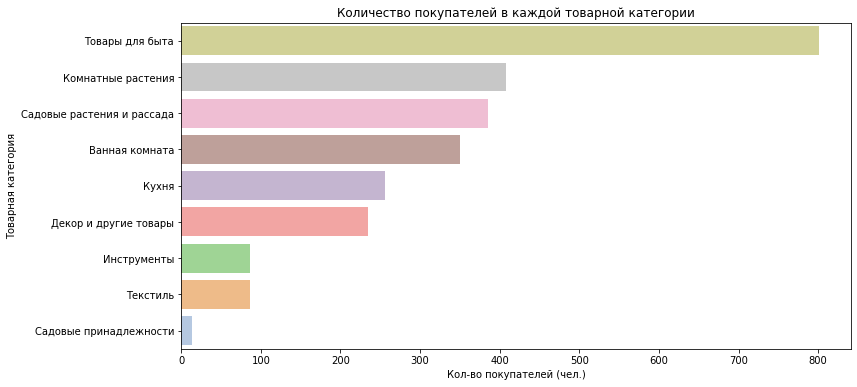

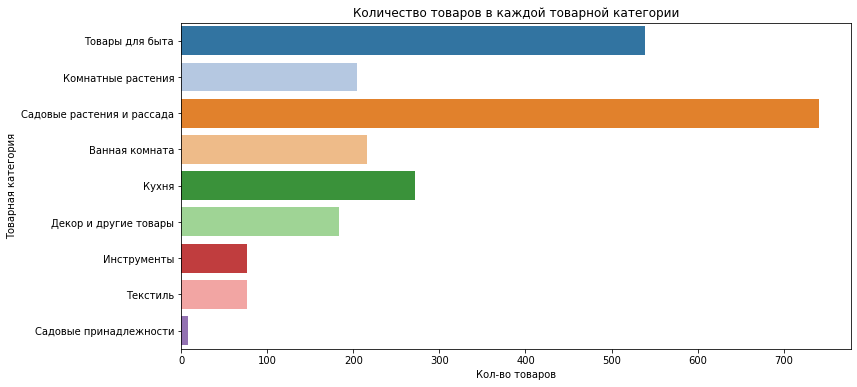

,product_category,n_customers,n_products,customers_perc,products_perc
8,Товары для быта,801,539,33.3,23.3
3,Комнатные растения,408,204,17.0,8.8
6,Садовые растения и рассада,385,741,16.0,32.0
0,Ванная комната,350,216,14.6,9.3
4,Кухня,256,272,10.6,11.7
1,Декор и другие товары,235,183,9.8,7.9
2,Инструменты,87,77,3.6,3.3
7,Текстиль,86,77,3.6,3.3
5,Садовые принадлежности,14,8,0.6,0.3


In [32]:
# сгруппируем данные по категории и посчитаем кол-во покупателей и продуктов в каждой

customers_product_counter = data_upd.groupby('product_category').agg({'customer_id': 'nunique', 'product': 'nunique'}).reset_index() \
.sort_values(by='customer_id', ascending=False)

# построим барплоты

plt.figure(figsize=(12,6))
sns.barplot(data=customers_product_counter, x='customer_id', y='product_category', palette="tab20_r")
plt.title('Количество покупателей в каждой товарной категории')
plt.xlabel('Кол-во покупателей (чел.)')
plt.ylabel('Товарная категория')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=customers_product_counter, x='product', y='product_category', palette="tab20")
plt.title('Количество товаров в каждой товарной категории')
plt.xlabel('Кол-во товаров')
plt.ylabel('Товарная категория')
plt.show()

# переименуем столбцы и рассчитаем долю 

customers_product_counter = customers_product_counter.rename({'customer_id': 'n_customers', 'product': 'n_products'}, axis = 'columns')
customers_product_counter['customers_perc'] = ((customers_product_counter['n_customers'] / \
                                                data_upd['customer_id'].nunique())*100).round(1)
customers_product_counter['products_perc'] = ((customers_product_counter['n_products'] / \
                                               data_upd['product'].nunique())*100).round(1)
display(customers_product_counter)

<div style="border:solid black 2px; padding: 20px">

1. 3 лидирующие категории по количеству покупателей: "Товары для быта", "Комнатные растения" и "Садовые растения и рассада".<br>

    
2. При этом ассортимент товаров больше всего представлен у категории "Садовые растения и рассада", <br> 
далее "Товары для быта" и "Кухня" на 2 и 3 месте, соответственно, по количеству товаров в категориях. И на 4-м месте категория "Ванная комната".<br>

    
3. Категории "Текстиль" и "Инструменты" совпадают как по количеству покупателей, так и по кол-ву товаров в ассортименте.<br>

    
4. Категория "Садовые принадлежности" самая малочисленная по кол-ву товаров и вероятно со временем при расширении ассортимента она могла бы выйти на более высокий уровень по количеству покупателей.<br>
    
</div>

### Самые продаваемые товары в каждой из категорий

Определим какие товары самые продаваемые в каждой из товарных категорий.

In [33]:
# сгруппируем по категориям и товарам: подсчитаем сумму `quantity`

bestsellers_by_category = data_upd.groupby(['product_category', 'product']).agg({'quantity': 'sum'}).reset_index() \
.sort_values(by='quantity', ascending=False)

# и в цикле по каждой категории выведем на экран таблицы с ТОП-5 товаров 

for category in data_upd['product_category'].unique():
    top5_bestsellers = bestsellers_by_category.query('product_category== @category').head(5)
    print('Самые продаваемые товары в категории "{}":'.format(category))
    display(top5_bestsellers[['product', 'quantity']])
    print('------------------------------------------------------------------------------------------------------------------')

Самые продаваемые товары в категории "Комнатные растения":


,product,quantity
614,пеларгония розебудная red pandora укорененный черенок,83
612,пеларгония розебудная prins nikolai укорененный черенок,64
568,пеларгония зональная диам. 12 см красная махровая,63
586,пеларгония зональная диам. 12 см сиреневый полумахровый,63
611,пеларгония розебудная mary укорененный черенок,47


------------------------------------------------------------------------------------------------------------------
Самые продаваемые товары в категории "Садовые растения и рассада":


,product,quantity
1205,"однолетнее растение петуния махровая в кассете 4 шт, россия",80
1683,циперус зумула d-12 см h-25 см,38
1294,рассада арбуза сорт огонек горшок 9х9 см p-9,29
1262,петуния махровая рассада однолетних цветов в кассете по 10 шт,25
1472,роза кустовая ред лейс 60 см кения плантация waridi limited 10 штук в упаковке,25


------------------------------------------------------------------------------------------------------------------
Самые продаваемые товары в категории "Ванная комната":


,product,quantity
213,"ёрш унитазный с деревянной ручкой , ваир 1712012",73
188,"таз пластмассовый 4,5 л пищевой ""космея"" (ангора) 1404092",36
192,"таз пластмассовый 8,0 л пищевой (минеральные воды), 1404009",21
191,"таз пластмассовый 6,0 л пищевой м2511, 1404015",21
119,сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м,20


------------------------------------------------------------------------------------------------------------------
Самые продаваемые товары в категории "Товары для быта":


,product,quantity
1971,коврик придверный attribute nature кокосовый 60x40 см amc015,54
2134,сумка-тележка 2-х колесная gimi argo синяя,47
1804,"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",37
1818,вешалка для костюма прямая 44 см красное дерево attribute ahr141,35
1837,вешалка-плечики без эссенции цвет тёмно-розовый fwm/l-pink,35


------------------------------------------------------------------------------------------------------------------
Самые продаваемые товары в категории "Кухня":


,product,quantity
793,"нож кухонный универсальный с пластмассовой ручкой 285 х 150 мм, ""русская линия"" (нх-38м) метиз 1519022",24
785,нетканые салфетки в рулоне 70 шт eurohouse eh4967,20
874,тарелка десертная attribute rosette 19 см adr131,20
808,салфетка protec textil polyline 30х43 см аметист белая 6230,20
801,половник attribute blossom пластик agb305,20


------------------------------------------------------------------------------------------------------------------
Самые продаваемые товары в категории "Декор и другие товары":


,product,quantity
376,цветок искусственный гвоздика пластиковая одиночная в ассортименте 50 см,96
279,муляж банан желтый 21 см полиуретан,59
313,муляж оранжевое яблоко мини полиуретан d-5 см,54
324,"муляж яблоко, оранжевый, 8,5 см, полиуретан",52
380,цветок искусственный крокус 20 см,41


------------------------------------------------------------------------------------------------------------------
Самые продаваемые товары в категории "Текстиль":


,product,quantity
1725,"ткань универсальная из микрофибры micro magic серая, leifheit, 40020",13
1706,"наматрацник natures бархатный бамбук бб-н-1-2 односпальный, 100% хлопок, стеганый 90х200 см, с резинкой по углам, белый",12
1709,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10
1703,кухонное полотенце махровое 42х28 см wellness фреш-mix,10
1754,"штора для ванной комнаты diamante 240х200 см бежевая, bacchetta, 4800",6


------------------------------------------------------------------------------------------------------------------
Самые продаваемые товары в категории "Инструменты":


,product,quantity
464,"стяжка оконная с болтом ст-55 цинк, 1108354",36
466,"уголок оконный 100х100 мм медь антик с полимерным покрытием *тонар*, 1109038",24
400,"завертка форточная белая/антик с полимерным покрытием *тонар*, 1108287",22
403,"крепеж для пружины дверной, 1107055",20
475,"штангенциркуль 150 мм пластмассовый, точность 0,1 мм 3015515, 0910007",15


------------------------------------------------------------------------------------------------------------------
Самые продаваемые товары в категории "Садовые принадлежности":


,product,quantity
955,"корыто оцинкованное 45 л бесшовное, 1303007",8
957,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см, сталь",5
954,"корыто оцинкованное 45 л бесшовное, 1301031",4
953,"корзинка с крышкой natural style l 30 л 23,1*43,6*32,5 см кремовый d 03619-885 curver 03619-885",3
952,"камнеломка тенистая вариегата розовый объем 0,5 л",3


------------------------------------------------------------------------------------------------------------------


<div style="border:solid black 2px; padding: 20px">
    
- Выделяется категория "Комнатные растения": самыми продаваемыми в ТОП-5 товарами оказались разнообразные <b>пеларгонии</b>.<br>
- В категориях "Садовые растения и рассада", "Садовые принадлежности", "Текстиль" и "Инструменты" <b>разнотипные товары в спросе.</b><br>
- В категории "Ванная комната" самым продаваемым товаром оказался <b>ёрш унитазный</b>, а также <b>тазы</b>.<br>
- В категории "Товары для быта" пользуются спросом <b>придверные коврики и сумки-тележки.</b><br>
- В категории "Кухня" почти на одном уровне спроса: <b>ножи кухонные, тарелки десертные, салфетки, нетканные салфетки и половники</b>.<br>
- В категории "Декор и другие товары" популярны разнообразные <b>муляжи фруктов</b> и <b>искусственные цветки</b>.<br>
    
</div>

### Самые прибыльные товары в каждой из категорий

Определим какие товары самые прибыльные в каждой из товарных категорий.

In [34]:
profitable_products = data_upd.groupby(['order_id', 'product']).agg({'final_price': 'sum', 'product_category': 'max'}).reset_index()
profitable_products = profitable_products.groupby('product').agg({'final_price': 'sum', 'product_category': 'max'}).reset_index() \
.sort_values(by='final_price', ascending=False)

profitable_products = profitable_products.rename({'final_price': 'profit (rub)'}, axis = 'columns')

for category in data_upd['product_category'].unique():
    top5_prof_products = profitable_products.query('product_category== @category').head(5)
    print('Самые прибыльные товары в категории "{}":'.format(category))
    display(top5_prof_products[['product', 'profit (rub)']])
    print('-------------------------------------------------------------------------------------------------------------')

Самые прибыльные товары в категории "Комнатные растения":


,product,profit (rub)
1022,пеларгония розебудная red pandora укорененный черенок,11191
994,пеларгония зональная диам. 12 см сиреневый полумахровый,10780
976,пеларгония зональная диам. 12 см красная махровая,10514
2286,эвкалипт гунни d-17 см h-60 см,9866
1538,спатифиллум свит лауретта d-21 см h-95 см,8810


-------------------------------------------------------------------------------------------------------------
Самые прибыльные товары в категории "Садовые растения и рассада":


,product,profit (rub)
939,"однолетнее растение петуния махровая в кассете 4 шт, россия",6576
1076,петуния махровая рассада однолетних цветов в кассете по 10 шт,5266
2114,циперус зумула d-12 см h-25 см,4136
1384,роза одноголовая тоффи 70 см эквадор плантация greenrose 25 штук в упаковке,3925
45,афеляндра скуарроса дания микс в кашпо с автополивом,3524


-------------------------------------------------------------------------------------------------------------
Самые прибыльные товары в категории "Ванная комната":


,product,profit (rub)
1677,сушилка meliconi stendy junior,16782
1791,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,14917
1688,сушилка для белья gimi dinamik 30,10796
1740,сушилка для белья напольная ника сб3б 10 м белая,8265
1786,сушилка для белья потолочно-настенная gimi lift 200,8245


-------------------------------------------------------------------------------------------------------------
Самые прибыльные товары в категории "Товары для быта":


,product,profit (rub)
1594,сумка-тележка 2-х колесная gimi argo синяя,50405
1620,"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",28045
124,"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",20010
1605,сумка-тележка 3-х колесная gimi tris floral синяя,18893
1625,"сумка-тележка хозяйственная andersen treppensteiger scala shopper, hera, черная 119-004-80",18560


-------------------------------------------------------------------------------------------------------------
Самые прибыльные товары в категории "Кухня":


,product,profit (rub)
825,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,16536
1503,скатерть круглая d-175 см 50% полиэстер 50% хлопок белая wellness mld-187-эстель*01,11400
1483,скатерть 180 см wellness wtd180-лион*01 100% полиэстер,8832
1508,скатерть рим 88% полиэфир 12% хлопок прямоугольная 350х150 см голубая wellness mc355-рим*16,7496
587,контейнер для мусора доминик curver 25 л серебристый 05322-877,7480


-------------------------------------------------------------------------------------------------------------
Самые прибыльные товары в категории "Декор и другие товары":


,product,profit (rub)
1149,полки qwerty торонто белый 40х10 см 35х10 см 30х10 см 25х10 см 72015,10572
903,новогоднее дерево ель сербская d-21 см h-60 см,9441
1144,полки qwerty мадрид белый/чёрный 50х30х12 см 2 штуки и 30х24х12 см 2 штуки 72019,7986
1142,полки qwerty италия белый/серый 40х14х10 см 35х10х10 см 30х7х10 см 72006,7796
1140,полки qwerty барселона белый 28х28х15 см 23х23х15 см 17х17х15 см 72009,7647


-------------------------------------------------------------------------------------------------------------
Самые прибыльные товары в категории "Текстиль":


,product,profit (rub)
930,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,15680
879,"наматрацник natures бархатный бамбук бб-н-1-2 односпальный, 100% хлопок, стеганый 90х200 см, с резинкой по углам, белый",14196
2247,"штора для ванной комнаты diamante 240х200 см бежевая, bacchetta, 4800",7194
1132,покрывало жаккард karna стеганое kalven 260x260 см наволочки 50х70 см 2 шт 8681914002162,6134
2248,"штора для ванной комнаты quadretto 240х200 см белая, bacchetta, 4062",5995


-------------------------------------------------------------------------------------------------------------
Самые прибыльные товары в категории "Инструменты":


,product,profit (rub)
1586,стремянки colombo leonardo 3 ступени g300a03w черая 3649,7948
1563,стремянка 7 ступенчатая hailo 8040-707 xxl 13 см алюминиевая с лотком для инструментов,7724
1566,стремянка colombo factotum 4 ступени алюминий g110at4w,6898
1585,стремянки colombo leonardo 2 ступени g300a02w серая 3646,5998
1567,стремянка colombo factotum 4 ступени стальная g110l04w,5698


-------------------------------------------------------------------------------------------------------------
Самые прибыльные товары в категории "Садовые принадлежности":


,product,profit (rub)
1996,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см, сталь",24370
1997,урна уличная стальная сальвадор 02.021.0 46х110 см,7349
1998,урна уличная стальная юпитер 02.012.0 38х38х60 см,6899
631,"корыто оцинкованное 45 л бесшовное, 1303007",5992
621,"корзинка с крышкой natural style l 30 л 23,1*43,6*32,5 см кремовый d 03619-885 curver 03619-885",3147


-------------------------------------------------------------------------------------------------------------


<div style="border:solid black 2px; padding: 20px">
    
Видим, что почти во всех категориях есть виды товаров, которые приносят наибольшую выручку в каждой категории:<br><br>
    
- В категории "Комнатные растения": <b>пеларгонии.</b><br>
- В категории "Ванная": <b>сушилки для белья.</b><br>
- в категории "Товары для быта": <b>сумки-тележки.</b><br>
- В категории "Садовые принадлежности": <b>урны уличные.</b><br>
- В категории "Кухня": <b>скатерти и мусорные контейнеры.</b><br>
- В категории "Инструменты": <b>стремянки.</b><br>
- В категории "Декор и другие товары": <b>полки.</b><br>
- В категориях "Садовые растения и рассада" и "Текстиль" хорошо продаются <b>разного назначения товары и разные растения.</b><br>
    
</div>

### Анализ популярности категорий во времени (сезонность) 

Посмотрим как с течением времени в каждой из категорий меняется выручка от продаж и средний чек.

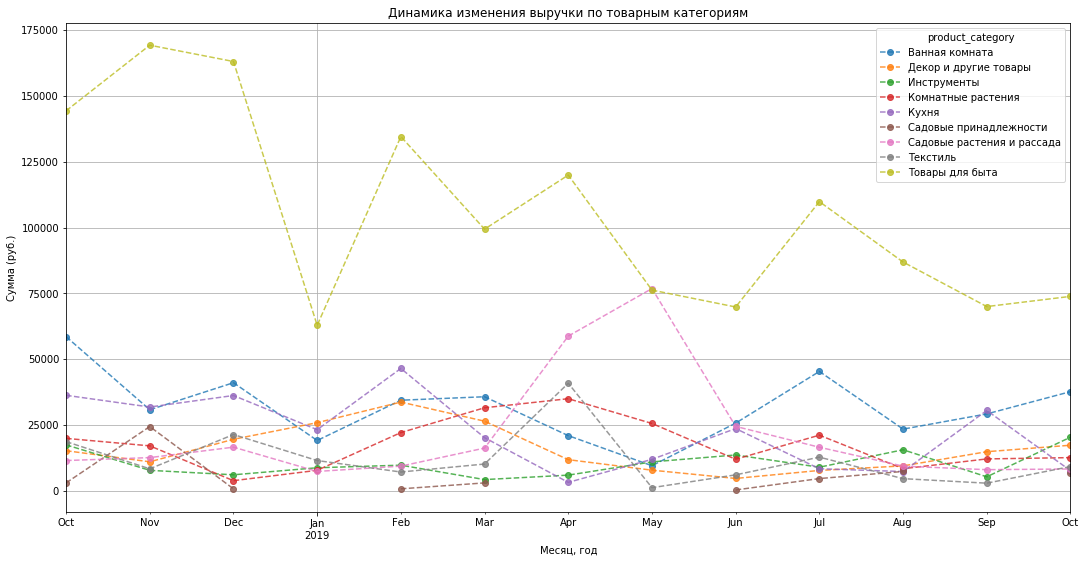

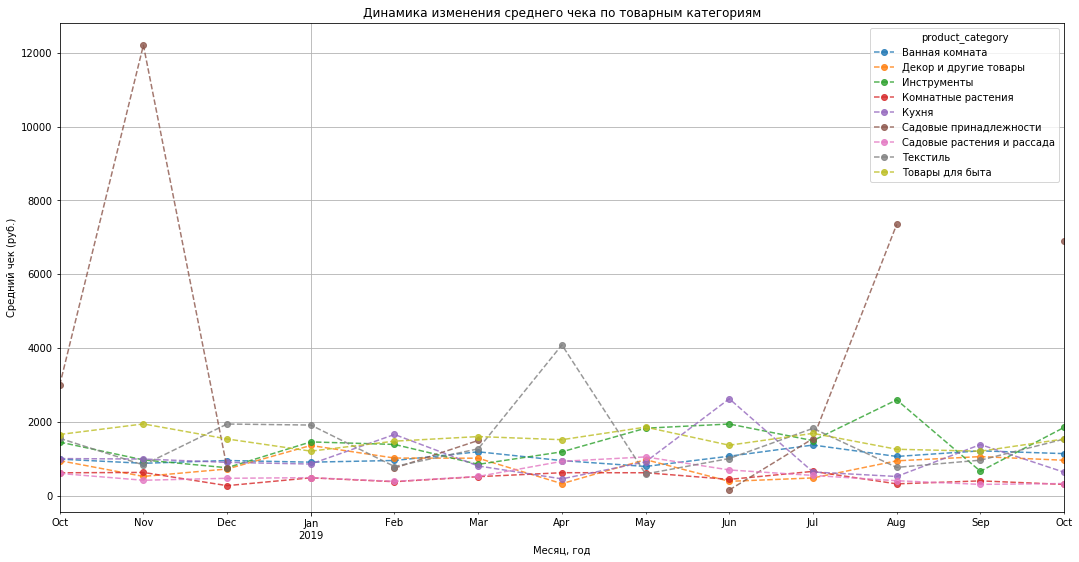

In [35]:
# создадим сводную таблицу с суммой выручки по каждой категории и построим лайнплот для отображения динамики во времени

categories_sales_pivot = \
data_upd.pivot_table(index = 'month_year', columns = 'product_category', values = 'final_price', aggfunc = 'sum') \
.plot(figsize = (18,9), style='o--', legend = True, grid = True, alpha = 0.8, \
      title='Динамика изменения выручки по товарным категориям').set(xlabel = 'Месяц, год', ylabel = 'Сумма (руб.)')
plt.show()

# и создадим сводную таблицу со средним чеком по каждой категории и построим лайнплот для отображения динамики во времени

categories_mean_check = data_upd.groupby(['month_year', 'product_category']).agg({'final_price': 'sum', 'order_id': 'nunique'}).reset_index()
categories_mean_check['mean_check'] = categories_mean_check['final_price'] / categories_mean_check['order_id']

categories_mean_check_pivot = \
categories_mean_check.pivot_table(index = 'month_year', columns = 'product_category', values = 'mean_check') \
.plot(figsize = (18,9), style='o--', legend = True, grid = True, alpha = 0.8, \
      title='Динамика изменения среднего чека по товарным категориям').set(xlabel = 'Месяц, год', ylabel = 'Средний чек (руб.)')
plt.show()

Т.к. есть значительный выброс посмотрим на срез в Ноябре по категории "Садовые принадлежности".

In [36]:
data_upd.query('month == "November" and product_category == "Садовые принадлежности"')

,date,customer_id,order_id,product,quantity,price,date_time,final_price,month_year,month,weekday,hour,product_category
661,2018-11-06,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см, сталь",5,4874,2018-11-06 12:00:00,24370,2018-11,November,Tuesday,12,Садовые принадлежности
960,2018-11-24,e72fcd9e-d3d0-4a40-8910-6bce6e794aed,69104,термометр уличный оконный тб 202 h-20 см 1210036,1,37,2018-11-24 09:00:00,37,2018-11,November,Saturday,9,Садовые принадлежности


**Ограничим ось Y** для детального рассмотра динамики чека.

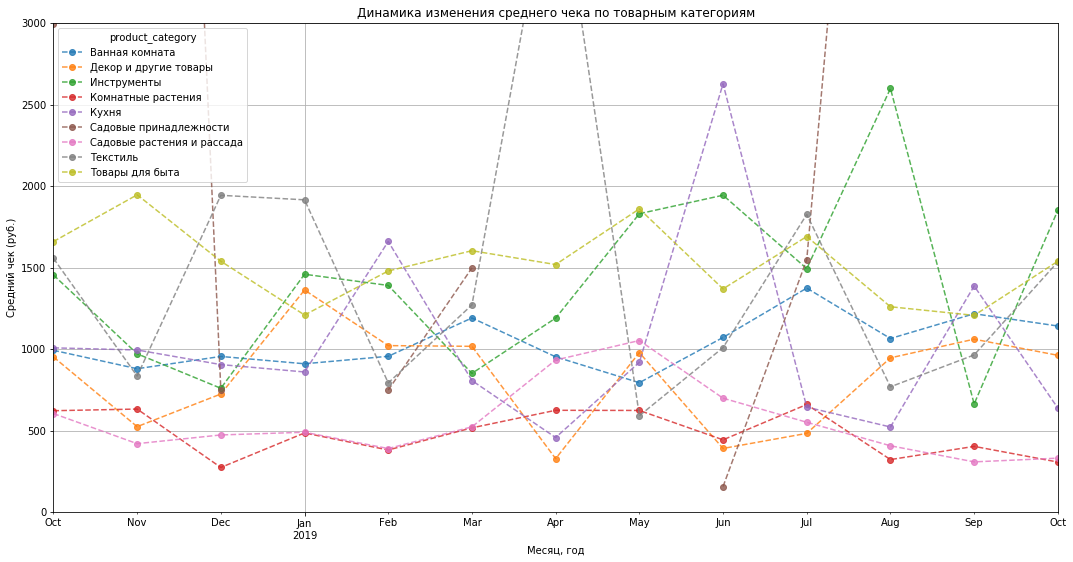

In [37]:
categories_mean_check_pivot = \
categories_mean_check.pivot_table(index = 'month_year', columns = 'product_category', values = 'mean_check') \
.plot(figsize = (18,9), style='o--', legend = True, grid = True, alpha = 0.8, \
      title='Динамика изменения среднего чека по товарным категориям') \
        .set(xlabel = 'Месяц, год', ylabel = 'Средний чек (руб.)', ylim=(0,3000))
plt.show()

<div style="border:solid black 2px; padding: 20px">
    
<b>Наблюдения по динамике изменения выручки:</b><br>
  
1. Категория "Товары для быта" по уровню выручки лидирует из всех категорий, имея при этом скачкообразную динамику: с Октября 2018 до Декабря 2018 имела высокие показатели по выручке, в Январе 2019 наблюдался спад (вероятно оказали влияние новогодние праздники и спад активности покупателей) и далее: скачкообразная динамика до Октября 2019 включительно.<br>
    
    
2. Категория "Садовые растения и рассада" имеет пиковые показатели выручки в весенние месяцы: Апрель 2019, Май 2019 (начало дачного сезона и потребность в рассаде и растениях для дачи). В остальные месяцы показатели выручки не так высоки, сопоставимы с выручкой от других категорий.<br>
    
3. У категории "Комнатные растения" с Марта 2019 по Май 2019 тоже заметен рост выручки.<br>
    
    
3. Динамика выручки по остальным категориям волнообразная.<br><br>

<b>Наблюдения по динамике именения среднего чека:</b><br>
    
1. По категории "Садовые принадлежности" в Ноябре 2018 сильно заметен выброс, исказивший средний чек - это из-за дорогого заказа на сумму 24370 руб (уличная урна 4874 руб./шт.).<br>
    
2. В Апреле 2019 по категории "Текстиль" наблюдается пиковое значение среднего чека.<br>
    
3. По категории "Садовые растения и рассада" показатели среднего чека (как и показатели выручки) в месяцы Апрель, Май, Июнь 2019 г. на пиковых позициях.<br>
    
4. Самые высокие показатели среднего чека в категории "Товары для быта".<br>
    
4. Самые низкие показатели среднего чека у категории "Комнатные растения".<br>
    
5. Все категории имеют скачкообразную динамику: точки спада и роста среднего чека. Средний чек держится в диапазоне от 500 руб. до 2000 руб.<br>
    
6. Плавнее всех динамика у категории "Ванная комната": средний чек в разные месяцы держится в районе от 750 руб. до 1100 руб.<br>
    
</div>

## Сегментация покупателей

### По товарным предпочтениям

В п.6.2. мы присвоили каждому покупателю в зависимости от предназначения купленного товара - категорию товара. 

Учитывая тот факт, что покупатель может оформлять заказы из разных категорий, то определять его в какую-то одну категорию было бы неправильно.

И поскольку в п.5.3. по нашим данным мы определили, что в среднем покупатели совершают 1 заказ оставим категории товаров как они есть в качестве 0.5 части конечного сегмента. Другую 0.5. часть определим по среднему чеку покупки.

### По частоте покупок

Т.к. ранее в п. 5.3. мы определили, что в среднем на 1 человека приходится 1 покупка - данный факт не позволяет нам произвести полноценную сегментацию по частоте покупок (например, по сегментам "постоянный покупатель", "случайный покупатель"). В нашем случае, можно сказать, все покупатели "случайные".

### По среднему чеку покупки

При текущей частоте покупок пользователей (в 1 покупку) нецелесообразно создавать много сегментов в зависимости от размера среднего чека покупки клиента (и как следствие терять потенциальных покупателей, которые, возможно, не успели еще проявиться).

Мы будем использовать при разделении 50 перцентиль и разделим клиентов на 2 группы:

- до 50 перцентиля (вкл.) (категорию обозначим как "Стандартный чек")
- и с 50 перцентиля (категорию обозначим как "Чек выше среднего")

In [38]:
# для каждого уникального покупателя рассчитаем его средний чек и создадим отдельный столбец с этим значением

customer_data = data_upd.groupby('customer_id').agg({'final_price': 'sum', 'order_id': 'nunique'}).reset_index()
customer_data['customer_mean_check'] = customer_data['final_price'] / customer_data['order_id']
np.percentile(customer_data['customer_mean_check'], [50])

array([658.])

Если средний чек покупателя <= 658 руб., определим такого покупателя в категорию <b>"Стандартный чек".</b>

Если чек > 658 руб., определим такого покупателя в категорию <b>"Чек выше среднего".</b>

In [39]:
customer_data.loc[customer_data['customer_mean_check'] <= 658, 'check_category'] = 'Стандартный чек'
customer_data.loc[(customer_data['customer_mean_check'] > 658), 'check_category'] = 'Чек выше среднего'
customer_data = customer_data[['customer_id', 'customer_mean_check', 'check_category']]
customer_data.head(3)

,customer_id,customer_mean_check,check_category
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,Стандартный чек
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,Стандартный чек
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,Чек выше среднего


Объединим получившуюся таблицу со средним чеком пользователя и с категорией чека с основным датасетом *data_upd* по столбцу `customer_id`.

In [40]:
data_upd = data_upd.merge(customer_data, on='customer_id')
data_upd.head(3)

,date,customer_id,order_id,product,quantity,price,date_time,final_price,month_year,month,weekday,hour,product_category,customer_mean_check,check_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142,2018-10-01,142,2018-10,October,Monday,0,Комнатные растения,1037.0,Чек выше среднего
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194,2018-10-01,194,2018-10,October,Monday,0,Комнатные растения,1037.0,Чек выше среднего
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112,2018-10-01,112,2018-10,October,Monday,0,Садовые растения и рассада,1037.0,Чек выше среднего


<div style="border:solid black 2px; padding: 20px">
    
<b>В итоге мы получили 18 покупательских сегментов в зависимости от товарных предпочтений и размера среднего чека покупателя:</b><br><br>
    
1. Стандартный чек в категории Комнатные и растения<br>
2. Стандартный чек в категории Садовые растения и рассада<br>
3. Стандартный чек в категории Ванная и Стандартный чек<br>
4. Стандартный чек в категории Товары для быта<br>
5. Стандартный чек в категории Текстиль<br>
6. Стандартный чек в категории Садовые принадлежности<br>
7. Стандартный чек в категории Кухня<br>
8. Стандартный чек в категории Инструменты<br>
9. Стандартный чек в категории Декор и другие товары<br>    
10. Чек выше среднего в категории Комнатные растения<br>
11. Чек выше среднего в категории Садовые растения и рассада<br>
12. Чек выше среднего в категории Ванная<br>
13. Чек выше среднего в категории Товары для быта<br>
14. Чек выше среднего в категории Текстиль<br>
15. Чек выше среднего в категории Садовые принадлежности<br>
16. Чек выше среднего в категории Кухня<br>
17. Чек выше среднего в категории Инструменты<br>
18. Чек выше среднего в категории Декор и другие товары<br><br>

В зависимости от принадлежности клиента к тому или иному сегменту можно сформировывать персонализированные предложения для клиентов.<br>
    
</div>

## Проверка статистических гипотез

### Гипотеза о статистически значимых различиях в среднем чеке между категориями "Товары для быта" и "Кухня"

Поскольку по графикам изменения динамики выручки и среднего чека заметно, что эти категории волнообразно сменяются и перекрывают друг друга (то спад, то рост), проверим есть ли статистически значимые отличия. 

**Сформулируем нулевую гипотезу H0:**

- **H0:** Статистически значимых различий в среднем чеке между категориями "Товары для быта" и "Кухня" нет.

**Сформулируем альтернативную гипотезу H1:**

- **H1:** Есть статистически значимые различия в среднем чеке между категориями "Товары для быта" и "Кухня".

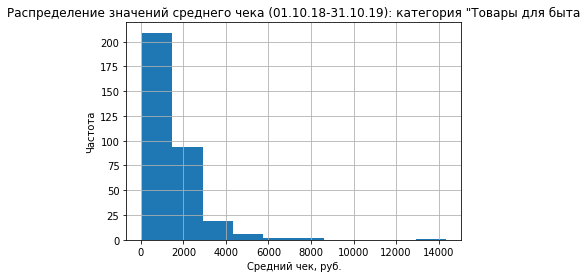

Размер выборки "Товары для быта": (333, 4)
------------------------------------------------------------------------------------------------------------------


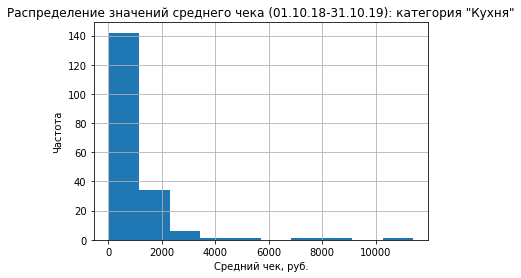

Размер выборки "Инструменты": (187, 4)


In [41]:
household_data = data_upd.query('product_category == "Товары для быта"').groupby('date').agg({'final_price': 'sum', 'order_id': 'nunique'}).reset_index()
household_data['mean_check'] = household_data['final_price'] / household_data['order_id']

kitchen_data = data_upd.query('product_category == "Кухня"').groupby('date').agg({'final_price': 'sum', 'order_id': 'nunique'}).reset_index()
kitchen_data['mean_check'] = kitchen_data['final_price'] / kitchen_data['order_id']


# посмотрим на распределения получившихся средних чеков

household_data['mean_check'].hist()
plt.title('Распределение значений среднего чека (01.10.18-31.10.19): категория "Товары для быта')
plt.xlabel('Средний чек, руб.')
plt.ylabel('Частота')
plt.show()
print('Размер выборки "Товары для быта":', household_data.shape)
print('------------------------------------------------------------------------------------------------------------------')

kitchen_data['mean_check'].hist()
plt.title('Распределение значений среднего чека (01.10.18-31.10.19): категория "Кухня"')
plt.xlabel('Средний чек, руб.')
plt.ylabel('Частота')
plt.show()
print('Размер выборки "Инструменты":', kitchen_data.shape)

В выборках имеются выбросы и распределения выборок нельзя назвать нормальными, поэтому используем для проверки <b>U-тест Манна-Уитни.</b>

Критический уровень статистической значимости  alpha выберем = 0.05 и считаем его допустимым, т.к. нет дополнительных поводов понижать alpha.

In [42]:
alpha = 0.05 

results = st.mannwhitneyu(household_data['mean_check'], kitchen_data['mean_check'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

p-значение:  2.2340580473314226e-14
Отвергаем нулевую гипотезу: разница статистически значима.


### Гипотеза о статистически значимых различиях в выручке между категориями "Текстиль" и "Инструменты"

Т.к. в данных категориях совпадает как кол-во товаров, так и количество покупателей (доля 3.6% клиентов и 3.3% товаров от общего кол-ва клиентов и товаров, соответственно, в обоих категориях), проверим есть ли статистически значимые отличия.

**Сформулируем нулевую гипотезу H0:**

- **H0:** Статистически значимых различий в выручке между категориями "Текстиль" и "Инструменты" нет.

**Сформулируем альтернативную гипотезу H1:**

- **H1:** Есть статистически значимые различия в выручке между категориями "Текстиль" и "Инструменты".

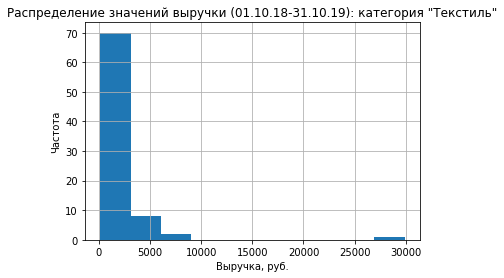

Размер выборки "Текстиль": (81, 2)
------------------------------------------------------------------------------------------------------------------


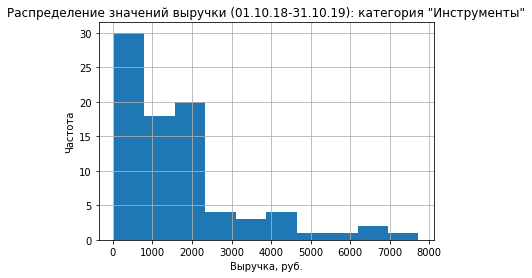

Размер выборки "Инструменты": (84, 2)


In [43]:
textile_data = data_upd.query('product_category == "Текстиль"').groupby('date').agg({'final_price': 'sum'}).reset_index()
textile_data = textile_data.rename({'final_price': 'revenue'}, axis='columns') 

tools_data = data_upd.query('product_category == "Инструменты"').groupby('date').agg({'final_price': 'sum'}).reset_index()
tools_data = tools_data.rename({'final_price': 'revenue'}, axis='columns') 


# посмотрим на распределения получившихся выручек

textile_data['revenue'].hist()
plt.title('Распределение значений выручки (01.10.18-31.10.19): категория "Текстиль"')
plt.xlabel('Выручка, руб.')
plt.ylabel('Частота')
plt.show()
print('Размер выборки "Текстиль":', textile_data.shape)
print('------------------------------------------------------------------------------------------------------------------')

tools_data['revenue'].hist()
plt.title('Распределение значений выручки (01.10.18-31.10.19): категория "Инструменты"')
plt.xlabel('Выручка, руб.')
plt.ylabel('Частота')
plt.show()
print('Размер выборки "Инструменты":', tools_data.shape)

Аналогичная ситуация: в выборках имеются выбросы и распределения выборок нельзя назвать нормальными, поэтому используем для проверки <b>U-тест Манна-Уитни.</b>

Критический уровень статистической значимости  alpha выберем = 0.05 и считаем его допустимым, т.к. нет дополнительных поводов понижать alpha.

In [44]:
alpha = 0.05  
results = st.mannwhitneyu(textile_data['revenue'], tools_data['revenue'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.') 

p-значение:  0.1959687997124368
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.


## Выводы и рекомендации

<div style="border: ridge black 3px; padding: 25px">
    
В результате проведенного исследования профилей потребления покупателей интернет-магазина товаров для дома "Пока все ещё тут" за период с 01 Октября 2018 по 31 Октября 2019 было установлено следующее:<br><br>
    
1. Выявлены редкие оптовые покупатели, оформившие заказ с более чем с 30 экз. товара. В исследовании они не учитывались.<br>
2. Дни, в которые оформляется больше всего заказов: Вторник и Понедельник.<br>
3. День, в который оформляется меньше всего заказов: Суббота.<br>
4. Временной интервал, в который оформляется больше заказов: с 9:00 утра до 15:00 дня. С 16:00 дня до 22:00 вечера показатели уже падают.<br>
5. Временной интервал, в который оформляется меньше всего заказов: с 23:00 вечера до 07:00 утра.<br>
    <hr>
6. Больше всего покупатели заказывают 1 товар по 1 экз.<br>
7. 1 среднестатистический покупатель интернет-магазина не делал больше 1 заказа за исследуемый период.<br>
8. 2-ой заказ оформляют крайне редко: 11 человек из 100.<br>
    <hr>
9. В среднем итоговая сумма заказа не превышает 674 руб. Большая часть итоговых сумм заказов располагается в диапазоне от 284 руб. до 1412 руб.<br>
    <hr>
10. Средний чек за исследуемый период = 1137 руб.<br>
11. Пиковые показатели среднего чека зафиксированы были в Октябре 2018 (1400 руб.) и Ноябре 2018 (1550 руб.), после чего показатели пошли на спад и вновь пиковые значения были зафиксированы только в Мае 2019 (1230 руб.) и Июле 2019 (1188 руб.).<br> Вероятно, на увеличение ср. чека оказало влияние начало дачного сезона в Мае и пора отпусков в Июле, освободившая время для дачных и домашних дел.<br>
    <hr>
12. В результате анализа наименований товарного ассортимента мы сформировали 9 товарных категорий:<br>
 - Комнатные растения<br>
 - Садовые растения и рассада<br>
 - Ванная<br>
 - Товары для быта<br>
 - Текстиль<br>
 - Садовые принадлежности<br>
 - Кухня<br>
 - Инструменты<br>
 - Декор и другие товары<br>
    <hr>
13. 3 лидирующие товарные категории по количеству покупателей: "Товары для быта", "Комнатные растения" и "Садовые растения и рассада".<br>
14. Ассортимент товаров больше всего представлен в категории "Садовые растения и рассада", далее "Товары для быта" и "Кухня" на 2 и 3 месте, соответственно.<br>
15.Категории "Текстиль" и "Инструменты" совпадают как по количеству покупателей, так и по кол-ву товаров в ассортименте. Доля 3.6% клиентов и 3.3% товаров от общего кол-ва клиентов и товаров (также при проверке гипотез определено, что между этими категориями нет статистически значимых различий в выручке).<br>
16. Категория "Садовые принадлежности" самая малочисленная по кол-ву товаров.<br>
    <hr>
17. Выявлены товары, пользующиеся наибольшим спросом среди всех товаров:<br>
 - В категории "Комнатные растения": самыми продаваемыми в ТОП-5 оказались разнообразные пеларгонии.<br>
 - В категории "Ванная комната": ёрш унитазный, а также тазы.<br>
 - В категории "Товары для быта": придверные коврики и сумки-тележки.<br>
 - В категории "Кухня" почти на одном уровне спроса: ножи кухонные, тарелки десертные, салфетки, нетканные салфетки и половники.<br>
 - В категории "Декор и другие товары": популярны разнообразные муляжи фруктов и искусственные цветки.<br>
 - В категориях "Садовые растения и рассада", "Садовые принадлежности", "Текстиль" и "Инструменты" разнотипные товары в спросе.<br>
    <hr>
    
18. Выявлены виды товаров, приносящие больше всего выручки:<br>
 - В категории "Комнатные растения": пеларгонии.<br>
 - В категории "Ванная": сушилки для белья.<br>
 - в категории "Товары для быта": сумки-тележки.<br>
 - В категории "Садовые принадлежности": урны уличные.<br>
 - В категории "Кухня": скатерти и мусорные контейнеры.<br>
 - В категории "Инструменты": стремянки.<br>
 - В категории "Декор и другие товары": полки.<br>
 - В категориях "Садовые растения и рассада" и "Текстиль" хорошо продаются разного назначения товары и разные растения.<br>
    <hr>
19. По уровню выручки за весь период наблюдений категория "Товары для быта" лидирует среди всех остальных категорий.<br>
20. В категории "Садовые растения и рассада" пиковые показатели выручки зафиксированы в весенние месяцы: Апрель 2019, Май 2019 (начало дачного сезона). У смежной категории "Комнатные растения" с Марта 2019 по Май 2019 тоже заметен рост выручки.<br>
21. Динамика изменения показателя выручки по остальным категориям волнообразная без четких закономерностей.<br>
    <hr>
22. Самые высокие показатели среднего чека в категории "Товары для быта".<br>
23. Самые низкие показатели среднего чека в категории "Комнатные растения".<br>
24. Все категории имеют скачкообразную динамику изменения среднего чека. Средний чек держится в диапазоне от 500 руб. до 2000 руб. Плавнее всех динамика среднего чека у категории "Ванная комната": в разные месяцы держится в районе от 750 руб. до 1100 руб.<br>
    <hr>
<b>В итоге при анализе профилей потребления покупателей и текущих данных мы cегментировали покупателей по 2-м критериям: 1)товарному предпочтению (категория товара) и 2) среднему чеку покупки (до 658 руб - Стандартный чек, после 658 - Чек выше среднего). <br><br>
Получили 18 покупательских сегментов:</b><br>
 
 1. Стандартный чек в категории Комнатные и растения<br>
 2. Стандартный чек в категории Садовые растения и рассада<br>
 3. Стандартный чек в категории Ванная и Стандартный чек<br>
 4. Стандартный чек в категории Товары для быта<br>
 5. Стандартный чек в категории Текстиль<br>
 6. Стандартный чек в категории Садовые принадлежности<br>
 7. Стандартный чек в категории Кухня<br>
 8. Стандартный чек в категории Инструменты<br>
 9. Стандартный чек в категории Декор и другие товары<br>
 10. Чек выше среднего в категории Комнатные растения<br>
 11. Чек выше среднего в категории Садовые растения и рассада<br>
 12. Чек выше среднего в категории Ванная<br>
 13. Чек выше среднего в категории Товары для быта<br>
 14. Чек выше среднего в категории Текстиль<br>
 15. Чек выше среднего в категории Садовые принадлежности<br>
 16. Чек выше среднего в категории Кухня<br>
 17. Чек выше среднего в категории Инструменты<br>
 18. Чек выше среднего в категории Декор и другие товары<br><br>

Каждому идентификатору клиента присвоены эти 2 критерия, данные содержатся в датасете `data_upd`.<br>
    <hr>
<br>
<b>РЕКОМЕНДАЦИИ:</b><br>
    
1. <b>В зависимости от принадлежности клиента к тому или иному сегменту можно сформировывать персонализированные предложения для клиентов.</b><br>
    
2. Для отслеживания оптовых покупателей или будущей возможной работы с ними рекомендуем для розничных покупателей установить лимит по возможному количеству добавлений позиций 1 товара в 1 заказ (для информации: не более, чем у 2% заказов встречается более 20 позиций одного и того же товара и не более, чем у 1% заказов встречается более 30 позиций одного и того же товара - явные оптовики).<br>
    
3. С 9:00 утра до 15:00 дня пиковая активность у покупателей, поэтому рекомендуем уже к этому периоду заблаговременно подготавливать запуск акций и спецпредложений.<br>
    
4. Стоит обратить внимание, что более чем 1 экземпляр товара покупает только 9.2% покупателей. Больше всего покупатели заказывают товара поштучно (79%).<br>
    
5. Поскольку в Мае и Июле были зафиксированы высокие показатели среднего чека по сравнению с остальными месяцами (не учитывая 2 месяца начала наблюдений: Ноябрь и Октябрь 2018), рекомендуем обратить внимание на этот период, акцентировать внимание на запуске выгодных предложений, разнообразии, доступности ассортимента как для розничных, так и для оптовых покупателей (при условии решения и возможности работы с ними).<br>
    
6. Рекомендуем обратить внимание на самые продаваемые и самые прибыльные товары и следить за достаточным их количеством и обновлять ассортимент новинками.<br>
    
7. Т.к. категория "Садовые принадлежности" на текущем этапе самая малочисленная по кол-ву товаров, динамику не удалось отследить, но в некоторые месяцы были замечены высокие показатели среднего чека. Рекомендуем рассмотреть вопрос о расширении ассортимента этой категории.<br>
    
</div>